In [ ]:
# Imporation des modules 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import altair as alt
from vega_datasets import data
# Lecture du fichier CSV student-mat
df_math = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-mat.csv')
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# affichage des donnés groupé par le sexe et l'âge pour les étudiants en maths
display(df_math[["school","sex","age","Dalc","Walc","health","G1","G2","G3","failures"]].groupby(["sex","age"]).agg(["min",'mean',"max"]).style.background_gradient(cmap="Wistia"))

In [74]:
df_por = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-por.csv')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [75]:
# affichage des donnés groupé par le sexe et l'âge pour les étudiants en portugais
display(df_por[["school","sex","age","Dalc","Walc","health","G1","G2","G3","failures"]].groupby(["sex", "age"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Wistia"))

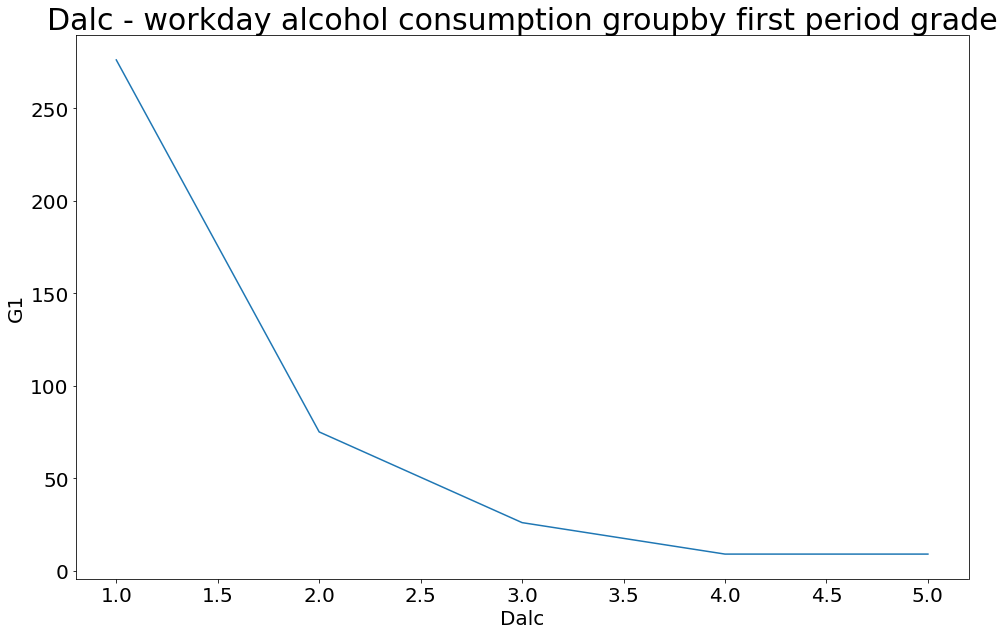

In [ ]:
# courbe représentatif de la consomation d'alcool des étudiants en maths par rapport aux notes du premier trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('Dalc').count()['G1']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby first period grade', fontsize=20)

plt.ylabel('G1')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

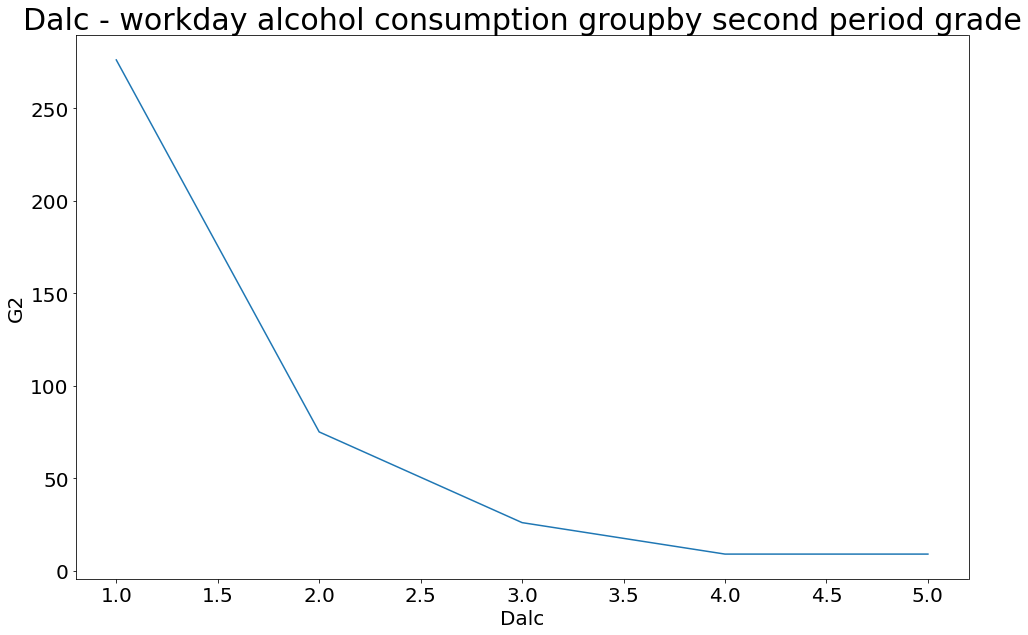

In [ ]:
# consomation d'alcool des étudiants en maths par rapport aux notes du second trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('Dalc').count()['G2']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby second period grade', fontsize=20)

plt.ylabel('G2')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

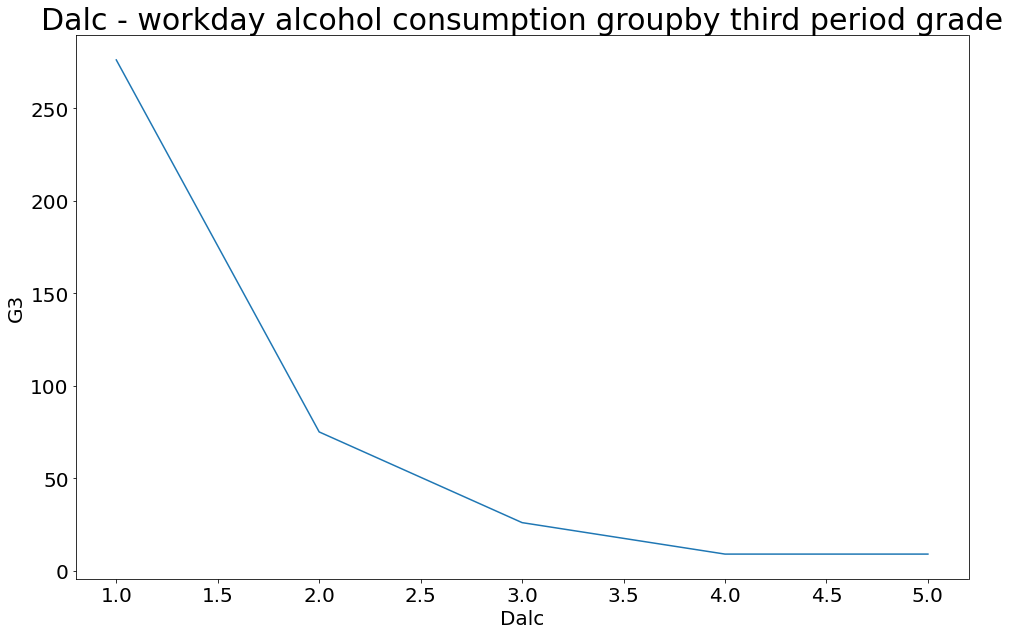

In [ ]:
# consomation d'alcool des étudiants en maths par rapport aux notes du troisième trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('Dalc').count()['G3']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby third period grade', fontsize=20)

plt.ylabel('G3')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

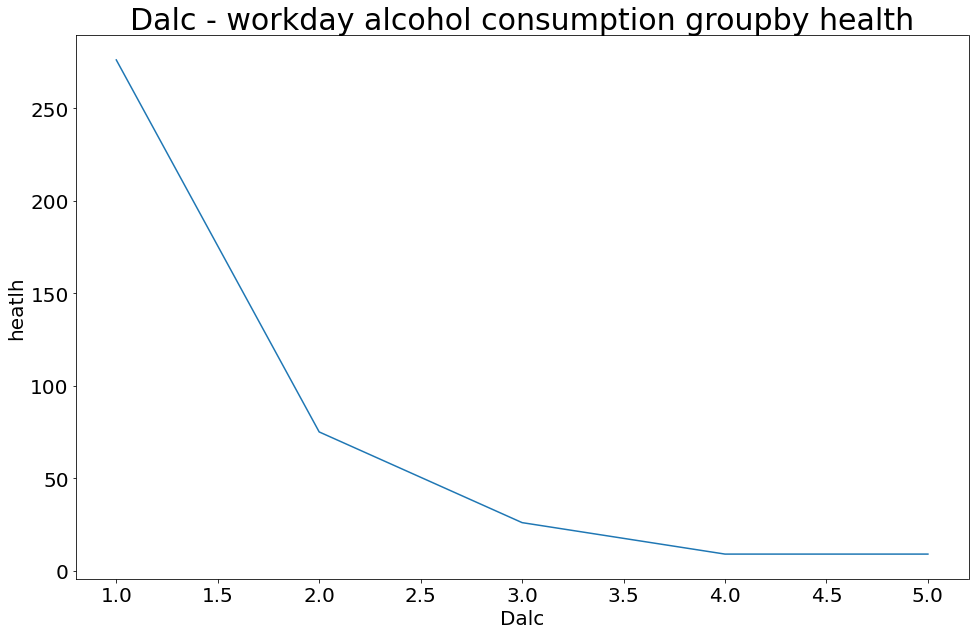

In [ ]:
# consomation d'alcool des étudiants en maths par rapport a la santé
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_math.groupby('Dalc').count()['health']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby health', fontsize=20)

plt.ylabel('heatlh')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

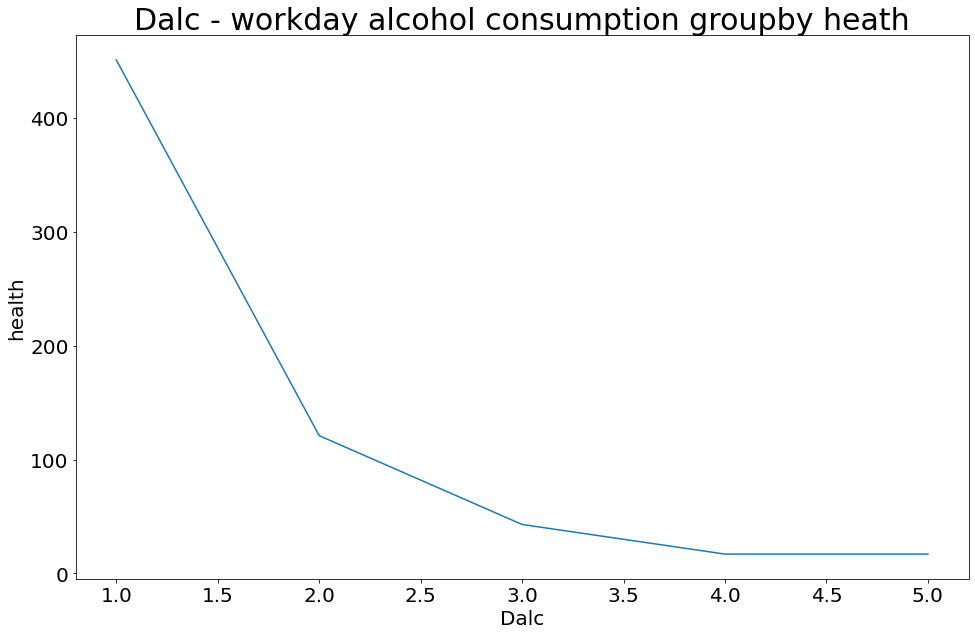

In [ ]:
# consommation d'alcool des étudiants en portugais par rapport à la santé
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('Dalc').count()['health']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby heath', fontsize=20)

plt.ylabel('health')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

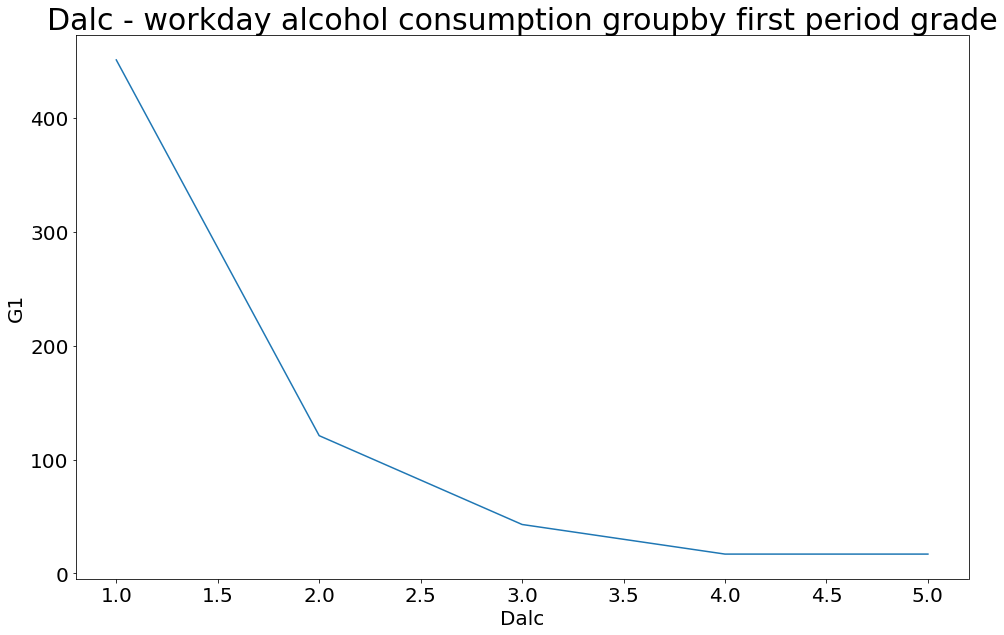

In [ ]:
# consommation d'alcool des étudiants en portugais par rapport aux notes du premier trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('Dalc').count()['G1']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby first period grade', fontsize=20)

plt.ylabel('G1')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

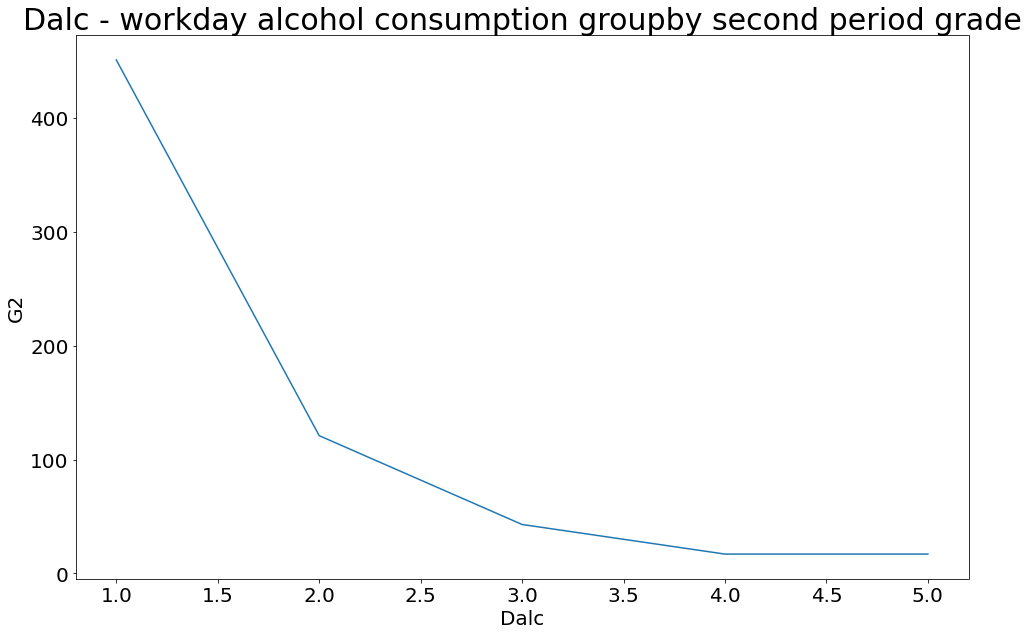

In [ ]:
# consommation d'alcool des étudiants en portugais par rapport aux notes du second trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('Dalc').count()['G2']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby second period grade', fontsize=20)

plt.ylabel('G2')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

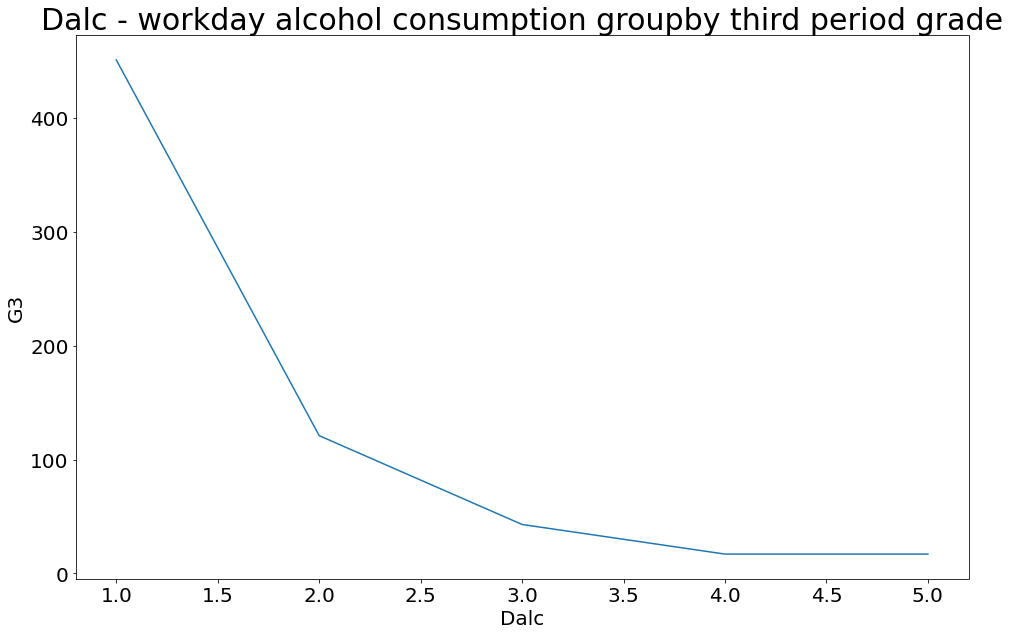

In [ ]:
# consommation d'alcool des étudiants en portugais par rapport aux notes du trimestre trimestre
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df_por.groupby('Dalc').count()['G3']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby third period grade', fontsize=20)

plt.ylabel('G3')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [70]:
alt.Chart(df_math).mark_circle(size=60).encode(
    x='age',
    y='Dalc',
    tooltip=['G1', 'G2', 'G3', 'health',]
).interactive()

alt.Chart(...)

In [71]:
alt.Chart(df_math).mark_circle(size=60).encode(
    x='age',
    y='Walc',
    tooltip=['G1', 'G2', 'G3', 'health',]
).interactive()

alt.Chart(...)

In [76]:
alt.Chart(df_por).mark_circle(size=60).encode(
    x='age',
    y='Dalc',
    tooltip=['G1', 'G2', 'G3', 'health',]
).interactive()

alt.Chart(...)

In [77]:
alt.Chart(df_por).mark_circle(size=60).encode(
    x='age',
    y='Walc',
    tooltip=['G1', 'G2', 'G3', 'health',]
).interactive()

alt.Chart(...)